In [1]:
from wordle_modeller import wordle_solver, formatgametohtml

import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import pandas as pd
import numpy as np

from IPython.core.display import display, HTML

sns.set_theme(style="darkgrid")
sns.color_palette()
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
#There are multiple choices available for dictionaries
g = wordle_solver(dict_file = 'wordle_words.txt')
#g = wordle_solver(dict_file = 'parole_words.txt')
#g = wordle_solver(dict_file = 'full_five_letters_words.txt')

Loaded dictionary with 2315 words


### Let's start with some basic frequency analysis on the wordlist

In [3]:
frequency, positions = g.analyse_frequency(ascount=False)
df1 = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])
df1.index.name = 'letter'
df1.sort_values(by=['frequency'], ascending=False)

,frequency
letter,
E,0.111784
A,0.088858
R,0.081981
O,0.068226
T,0.065750
L,0.064924
S,0.058964
N,0.052270
I,0.051077


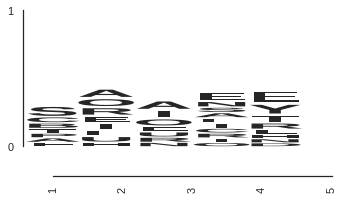

In [4]:
#plot a sequence logo of the most frequent letters by position
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from matplotlib import transforms
import matplotlib.patheffects
import numpy as np

class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)

fig = plt.figure()
fig.set_size_inches(len(positions),2.5)
ax = fig.add_subplot(111)
ax.set_xticks(range(len(positions)))

xshift = 0
trans_offset = transforms.offset_copy(ax.transAxes, 
                                  fig=fig, 
                                  x=0, 
                                  y=0, 
                                  units='points')

for pos in positions:
    yshift = 0
    for letter in pos:
        freq = pos[letter]
        if freq > 0.05:
            txt = ax.text(0, 
                          0, 
                          letter, 
                          transform=trans_offset,
                          fontsize=80, 
                          #color=COLOR_SCHEME[base],
                          weight='bold',
                          ha='center',
                          family='sans-serif'
                          )
            txt.set_clip_on(False) 
            txt.set_path_effects([Scale(1.0, freq)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*freq
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='points')
    xshift += window_ext.width
    trans_offset = transforms.offset_copy(ax.transAxes, fig=fig, x=xshift, units='points')


ax.set_yticks(range(0,2))


seaborn.despine(ax=ax, offset=30, trim=True)
ax.set_xticklabels(range(1,len(positions)+1), rotation=90)
ax.set_yticklabels(np.arange(0,2,1))
plt.show()

<AxesSubplot:title={'center':'Frequency of letters in the wordle database'}, xlabel='letter'>

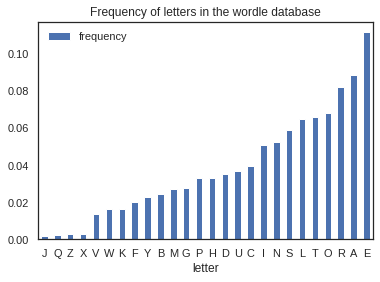

In [5]:
df1.plot(kind="bar", rot=0, title='Frequency of letters in the wordle database')#, color='#a51d2dff')

In [6]:
g.frequency_rank(limit=50)

['LATER',
 'ALTER',
 'ALERT',
 'AROSE',
 'STARE',
 'LEARN',
 'RENAL',
 'IRATE',
 'SNARE',
 'SANER',
 'ARISE',
 'RAISE',
 'STALE',
 'SLATE',
 'STEAL',
 'LEAST',
 'REACT',
 'CRATE',
 'TRACE',
 'CATER',
 'CLEAR',
 'ATONE',
 'STORE',
 'ADORE',
 'ALONE',
 'LOSER',
 'OPERA',
 'TREAD',
 'TRADE',
 'LEANT',
 'HEART',
 'HATER',
 'EARTH',
 'TAPER',
 'SCARE',
 'PALER',
 'PEARL',
 'TENOR',
 'GREAT',
 'GRATE',
 'AISLE',
 'TAMER',
 'REGAL',
 'LARGE',
 'GLARE',
 'LAGER',
 'SHARE',
 'SHEAR',
 'SPARE',
 'PARSE']

In [7]:
for word in ['snare', 'sleep', 'slept', 'tomas']:
    print ( g.check_rank(word) )

{'SNARE': 65, 'total': 2315}
{'SLEEP': 124, 'total': 2315}
{'SLEPT': 539, 'total': 2315}
{'TOMAS': 'not found', 'total': 2315}


### To visualize a single game:

In [8]:
r = g.solve(use_smart=True, exclude=0)
#this visualization requires CSS and will not work on github
display(HTML(formatgametohtml(r['game'])))
r['game']

[('SANER', '__nE_'),
 ('INDEX', '_N_E_'),
 ('UNMET', '_N_E_'),
 ('KNEEL', 'KNEEL')]

### Let's start solving to compare strategies

In [9]:
#stupid mode - just random words with no rationale
r0 = g.solve_many(use_smart=False, stupid_mode=True, N_GAMES=10000, exclude=0)
r0['success_rate']

0.0027

In [10]:
#do you want to try performance on today's word? If yes, put it here. Otherwise for general performance set to None
guess_word = None

#do you want to try performance with a given starting word?
start_with = None

In [11]:
r1 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=False, N_GAMES=1000, exclude=0)

In [12]:
r2 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=0)

In [13]:
r3 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=1)

In [14]:
r4 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=2)

In [15]:
df1 = pd.DataFrame(data=r1['profile'])
df1.index.name = 'game'
df1.columns = ['success']
df1['use_smart'] = False
df1['exclude'] = 0
df1['strategy'] = 'No smart start, no exclusion'

In [16]:
df2 = pd.DataFrame(data=r2['profile'])
df2.index.name = 'game'
df2.columns = ['success']
df2['use_smart'] = True
df2['exclude'] = 0
df2['strategy'] = 'Smart start, no exclusion'

In [17]:
df3 = pd.DataFrame(data=r3['profile'])
df3.index.name = 'game'
df3.columns = ['success']
df3['use_smart'] = True
df3['exclude'] = 1
df3['strategy'] = 'Smart start, 1 exclusion'

In [18]:
df4 = pd.DataFrame(data=r4['profile'])
df4.index.name = 'game'
df4.columns = ['success']
df4['use_smart'] = True
df4['exclude'] = 2
df4['strategy'] = 'Smart start, 2 exclusions'

In [19]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,success,use_smart,exclude,strategy
0,3,False,0,"No smart start, no exclusion"
1,4,False,0,"No smart start, no exclusion"
2,3,False,0,"No smart start, no exclusion"
3,4,False,0,"No smart start, no exclusion"
4,7,False,0,"No smart start, no exclusion"
...,...,...,...,...
3995,6,True,2,"Smart start, 2 exclusions"
3996,4,True,2,"Smart start, 2 exclusions"
3997,4,True,2,"Smart start, 2 exclusions"
3998,5,True,2,"Smart start, 2 exclusions"


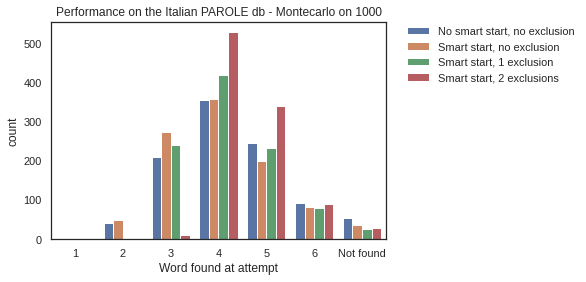

In [20]:
p = sns.countplot(data=df, x='success', hue='strategy')
p.set_xticklabels([1, 2, 3, 4, 5, 6, 'Not found'])
p.set_xlabel("Word found at attempt")
p.set_title("Performance on the Italian PAROLE db - Montecarlo on 1000")

# Place the legend out of the figure
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
print ('success rate: ', r1['success_rate'], r2['success_rate'], r3['success_rate'], r4['success_rate'])
print ('average success attempt: ', np.mean( r1['profile']), np.mean( r2['profile']),np.mean( r2['profile']), np.mean( r3['profile']))

success rate:  0.945 0.963 0.975 0.972
average success attempt:  4.303 4.103 4.103 4.219


### To solve a game follow this protocol

In [25]:
#start word can be totally random
word, _ = g.pick_random_word()
word

'SHOWY'

In [26]:
#or get one from the smart set if you prefer
g.pick_smart_word()

'STALE'

In [31]:
#enter the word in the game and fill the requirements for the next word based on the result
word, possibilities_left = g.pick_random_word(has_letters="ST", hasnot_letters="ALE", pattern="st___")

#the system returns a list of all the words that match those criteria
print (possibilities_left)

#and from that list picks a random word for you
print (word)

['CRUST', 'FIRST', 'BOOST', 'TRUSS', 'MOIST', 'MIDST', 'TIPSY', 'RUSTY', 'TRYST', 'MUSTY', 'GUSTY', 'VISIT', 'GUSTO', 'GHOST', 'WRIST', 'WORST', 'HOIST', 'POSIT', 'JOIST', 'JOUST', 'BURST', 'DUSTY', 'FOIST', 'TORUS', 'FROST', 'TWIST', 'TRUST', 'ROOST', 'TORSO']
TORSO
